# College Admission Classification Example

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('scores.csv', delimiter = ';')
print (data)

     Exam1  Exam2
0     1.74   4.69
1     3.18   8.84
2     5.85  13.76
3    10.56  18.22
4    15.38  18.69
..     ...    ...
145   9.08  15.88
146   6.36  11.19
147  11.79  17.65
148  15.49  14.49
149  15.03  10.03

[150 rows x 2 columns]


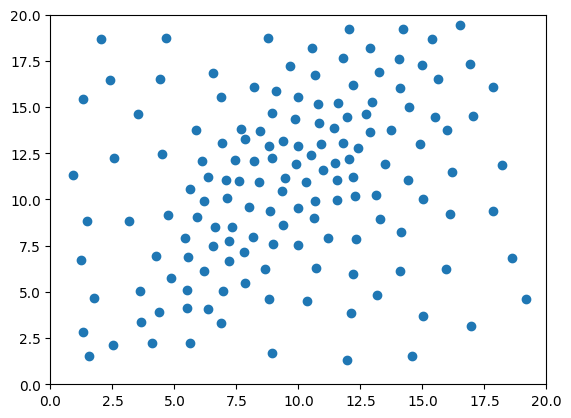

In [5]:
plt.scatter(data['Exam1'], data['Exam2'])
plt.axis([0, 20, 0, 20])
plt.show()

In [6]:
decision =(data['Exam1'] + data['Exam2']) / 2 > 10
print(decision)

0      False
1      False
2      False
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149     True
Length: 150, dtype: bool


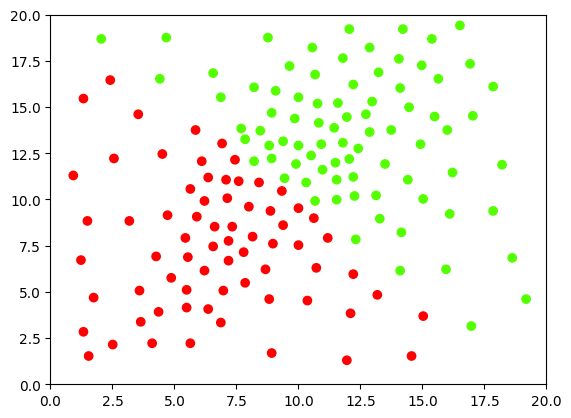

In [7]:
plt.scatter(data['Exam1'], data['Exam2'], c = decision, cmap = 'prism') 
plt.axis([0, 20, 0, 20])
plt.show()

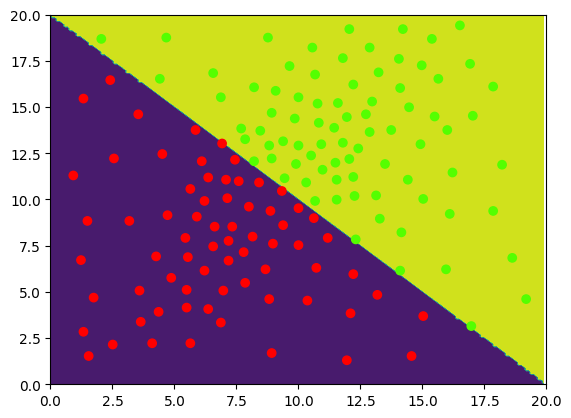

In [10]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),  #mesgrid ->de numpy, crée des grilles rectangulaires
                     np.arange(y_min, y_max, plot_step)) 
Z = (xx.ravel()+ yy.ravel()) / 2 > 10  # ravel -> transforme un tableau multi dim en 1 ligne (array)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z) #contourf -> affiche les contours 

plt.axis([0, 20, 0, 20])
plt.scatter(data['Exam1'], data['Exam2'], c = decision, cmap="prism")
plt.show()

In [15]:
data2 = pd.read_csv('scores_and_decisions.csv', delimiter = ';')
print (data2)

     Exam1  Exam2  Decision
0     1.74   4.69         0
1     3.18   8.84         0
2     5.85  13.76         0
3    10.56  18.22         1
4    15.38  18.69         1
..     ...    ...       ...
145   9.08  15.88         1
146   6.36  11.19         0
147  11.79  17.65         1
148  15.49  14.49         1
149  15.03  10.03         1

[150 rows x 3 columns]


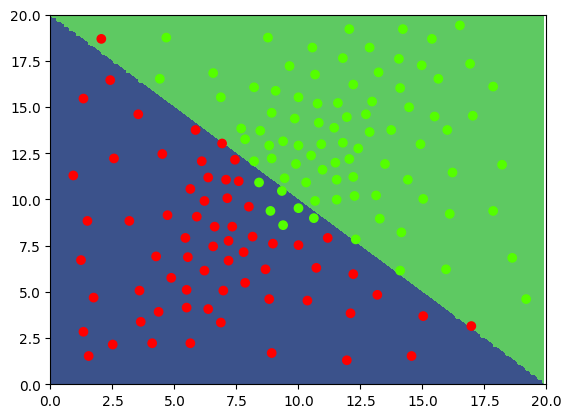

In [16]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = (xx.ravel()+ yy.ravel()) / 2 > 10
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, levels = 1)

plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'], cmap = "prism" )   #cmap= mettre couleurs
plt.show()

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd")
Data = data2.to_numpy()
lda.fit(Data[:,0:2], Data[:,2])
decision_pred = lda.predict(Data[:,0:2])

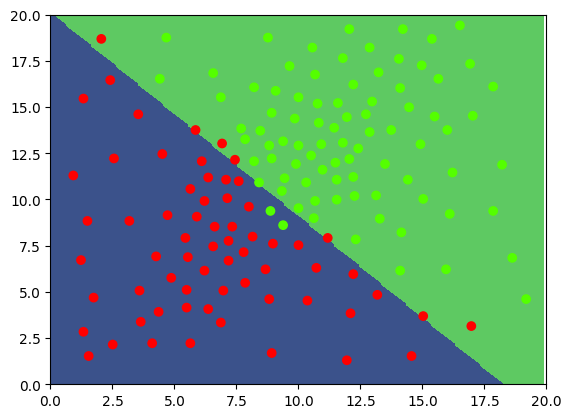

In [18]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, levels = 1)
plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'] , cmap = "prism")
plt.show()

In [19]:
lda.predict([[19,0]])

array([1.])

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

Data = data2.to_numpy()

qda.fit(Data[:,0:2], Data[:,2])

decision_pred = qda.predict(Data[:,0:2])

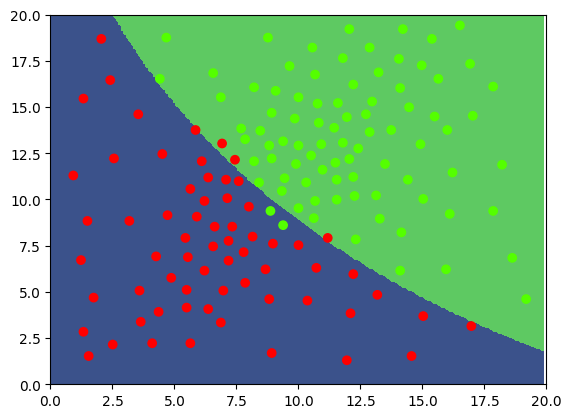

In [21]:


x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, levels = 1)

plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'], cmap = "prism" )
plt.show()

In [22]:
qda.predict([[20,1], [1,20], [9.5,9.5]])

array([0., 0., 1.])

---
# Create a Decisision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split = 2,max_depth = 6)
dtc.fit(Data[:,0:2], Data[:,2])

DecisionTreeClassifier(max_depth=6)

In [42]:
dtc.predict([[0,20]])

array([0.])

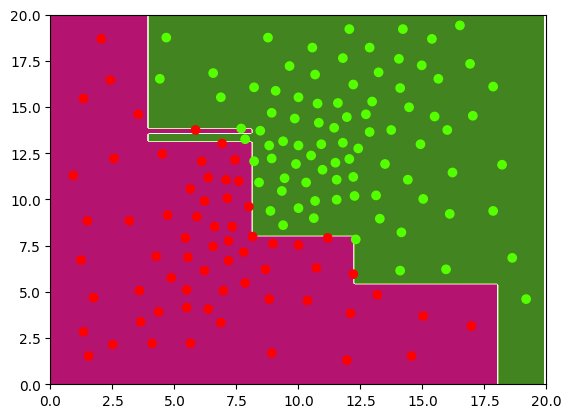

In [43]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.10
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap="PiYG")

plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'] , cmap = "prism" )
plt.show()

In [37]:
from sklearn import tree
text_representation = tree.export_text(dtc, feature_names=['Test1','Test2'])
print(text_representation)


|--- Test1 <= 8.18
|   |--- Test2 <= 13.14
|   |   |--- class: 0.0
|   |--- Test2 >  13.14
|   |   |--- Test1 <= 3.97
|   |   |   |--- class: 0.0
|   |   |--- Test1 >  3.97
|   |   |   |--- Test2 <= 13.80
|   |   |   |   |--- class: 0.0
|   |   |   |--- Test2 >  13.80
|   |   |   |   |--- class: 1.0
|--- Test1 >  8.18
|   |--- Test2 <= 8.07
|   |   |--- Test1 <= 12.26
|   |   |   |--- class: 0.0
|   |   |--- Test1 >  12.26
|   |   |   |--- Test2 <= 5.50
|   |   |   |   |--- Test1 <= 18.07
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Test1 >  18.07
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Test2 >  5.50
|   |   |   |   |--- class: 1.0
|   |--- Test2 >  8.07
|   |   |--- class: 1.0



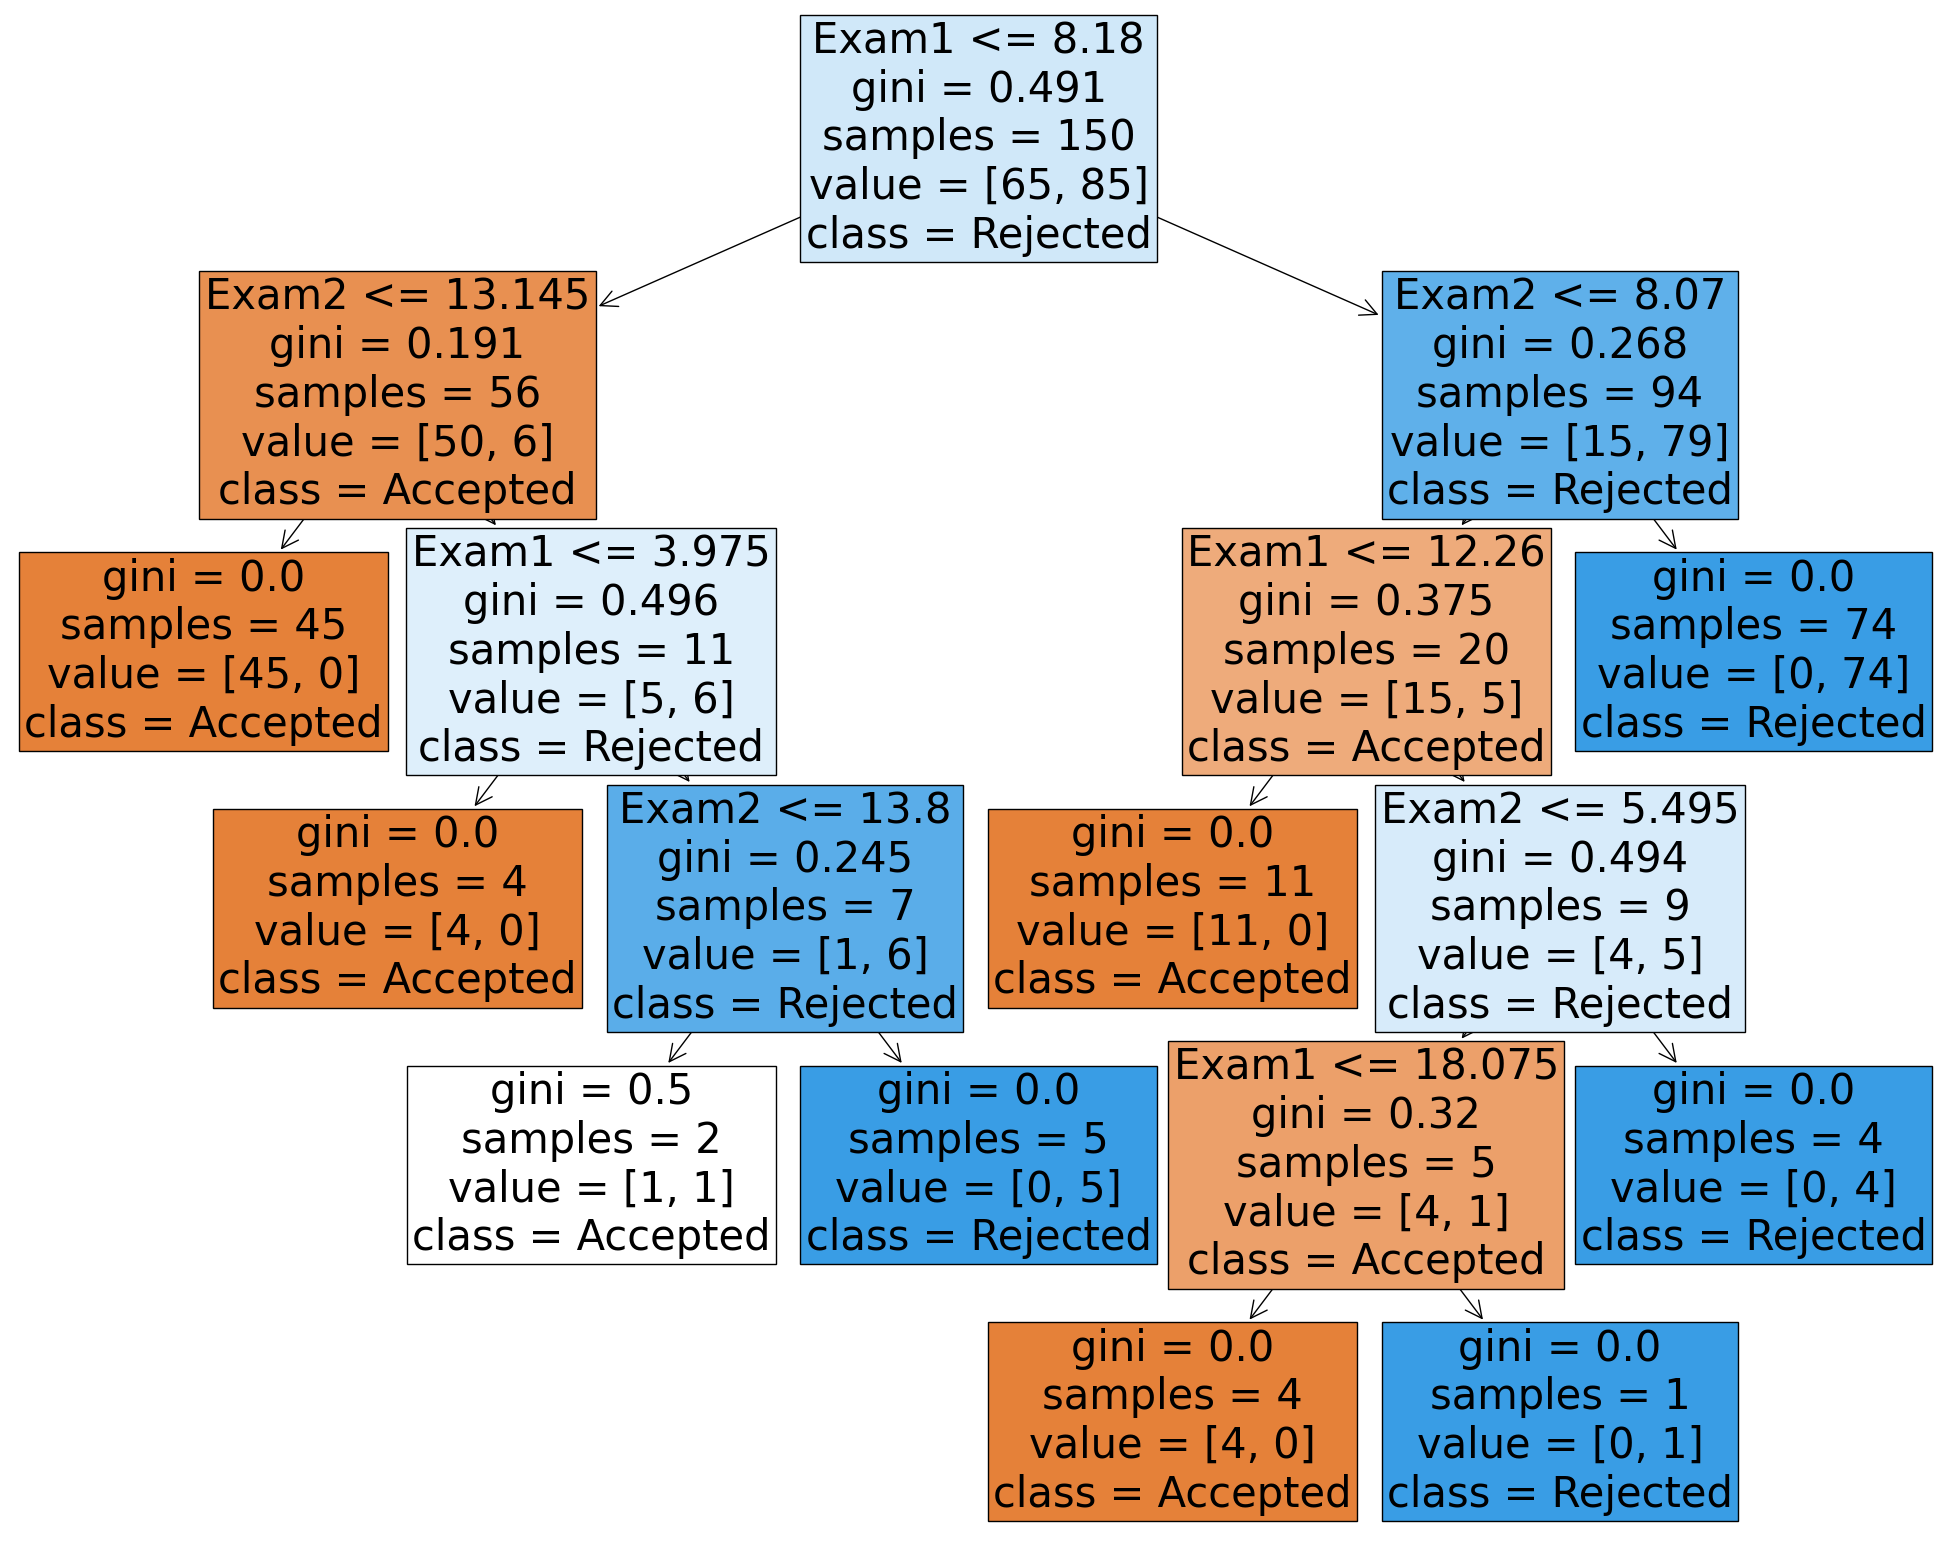

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=['Exam1','Exam2'],  
                   class_names=['Accepted','Rejected'],
                   fontsize = 30,
                   filled=True)


---

# Create a K-Nearest Neighbors Classifier (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(Data[:,0:2], Data[:,2])


KNeighborsClassifier(n_neighbors=20)

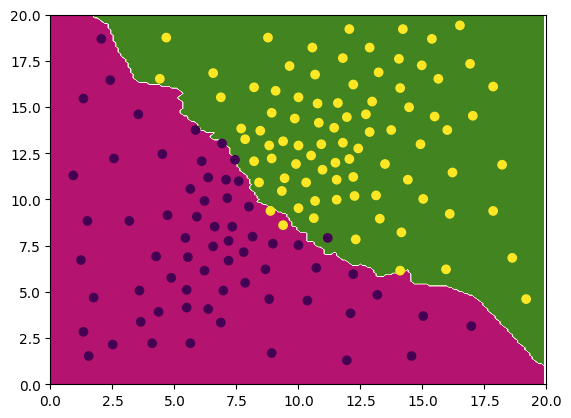

In [49]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.10
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap="PiYG")

plt.axis([0, 20, 0, 20])
plt.scatter(data2['Exam1'], data2['Exam2'], c = data2['Decision'] )
plt.show()

In [66]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [58]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
